In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('mtcars (2).csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
y=df['mpg']
x=df.drop(['mpg','model','vs','am'],axis=1)

In [6]:
import statsmodels.api as sm

xc=sm.add_constant(x)
lr=sm.OLS(y,x).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              252.2
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    3.06e-21
Time:                        14:23:10   Log-Likelihood:                         -71.654
No. Observations:                  32   AIC:                                      159.3
Df Residuals:                      24   BIC:                                      171.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl            0.2887      0.653      0.442      0.662      -1.059       1.637
disp           0.0134      0.018      0.762      0.453      -0.023       0.050
hp            -0.0200      0.021     -0.966      0.344      -0.063       0.023
drat           1.8765      1.399      1.341      0.192      -1.011       4.764
wt            -4.1185      1.852     -2.224      0.036      -7.940      -0.297
qsec           1.0283      0.388      2.648      0.014       0.227       1.830
gear           1.9762      1.191      1.659      0.110      -0.483       4.435
carb          -0.3575      0.809     -0.442      0.663      -2.028       1.313
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                1.590
Skew:                           0.546   Prob(JB):                        0.452
Kurtosis:                       3.005   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif=[vif(xc.values,i) for i in range (xc.shape[1])]
pd.DataFrame(vif,index=xc.columns,columns=['vif'])

,vif
const,1478.067733
cyl,13.189675
disp,21.402534
hp,9.102122
drat,3.292037
wt,14.962903
qsec,5.556476
gear,4.827297
carb,7.825779


In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xs=ss.fit_transform(x)
xs=pd.DataFrame(xs,columns=x.columns)

In [11]:
from sklearn.decomposition import PCA

pca=PCA()

In [12]:
pca.fit(xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.explained_variance_

array([4.96022693, 2.14728253, 0.49765386, 0.27357005, 0.18043075,
       0.11258685, 0.06174454, 0.02456902])

In [ ]:
# Eigen value of first component is the best. the following ones are worse than the previous ones.

In [14]:
pca.explained_variance_ratio_

array([0.60065248, 0.26002249, 0.06026277, 0.03312762, 0.02184904,
       0.01363356, 0.00747688, 0.00297515])

In [ ]:
# The first 4 components contribute 95% of variance in the data. we can use 4 components

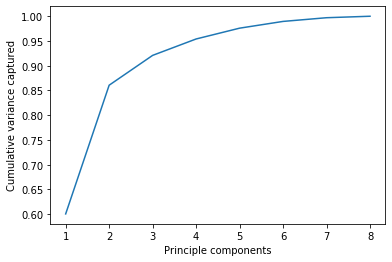

In [17]:
plt.plot(range(1,9),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle components')
plt.ylabel('Cumulative variance captured')
plt.show()

In [ ]:
### The figure gives proportion of variance captured by number of components.It shows that the first 4 components 
### are accounting for 95% of variation in the data. Hence, we choose the number of components to be 4.

In [18]:
pca=PCA(n_components=4,whiten=True)
pca.fit(xs)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [19]:
data_pc=pca.fit_transform(xs)

In [20]:
data_pc=pd.DataFrame(data_pc,columns=['pc1','pc2','pc3','pc4'])
data_pc.head()

,pc1,pc2,pc3,pc4
0,0.295328,0.820110,-0.388309,-0.250814
1,0.283841,0.683808,0.087494,-0.170300
2,1.053095,-0.203379,-0.506536,-0.218664
3,0.070655,-1.373808,-0.405105,-0.596401
4,-0.742855,-0.594413,-1.343109,0.288258


In [21]:
pc=pd.DataFrame(pca.components_,columns=x.columns).T
pc.columns=['pc1','pc2','pc3','pc4']
pc

,pc1,pc2,pc3,pc4
cyl,-0.439711,0.006493,-0.213894,0.041177
disp,-0.432969,-0.097948,-0.023257,0.341541
hp,-0.401819,0.261415,0.027553,0.069929
drat,0.337419,0.348885,0.112778,0.844803
wt,-0.399860,-0.179106,0.507029,0.193569
qsec,0.252176,-0.478355,0.632540,-0.028712
gear,0.223540,0.555703,0.194703,-0.281562
carb,-0.265389,0.480206,0.495112,-0.213312


In [22]:
# Note: Provided above is the loadings matrix which gives the correlation between each of the components and features

In [23]:
# It shows that PC1 is highly correlated with cylinder, displacement, hp and wt. 
# It means in PC1, weightages of these features are large.

In [24]:
#Note: After transforming original data into components, we obtain data_pc(shape=32,4).

In [27]:
data_pc=sm.add_constant(data_pc)
lr=sm.OLS(y,data_pc).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     36.95
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.39e-10
Time:                        14:58:10   Log-Likelihood:                -72.494
No. Observations:                  32   AIC:                             155.0
Df Residuals:                      27   BIC:                             162.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0906      0.449     44.776      0.000      19.170      21.011
pc1            5.4699      0.456     11.999      0.000       4.535       6.405
pc2            0.2912      0.456      0.639      0.528      -0.644       1.227
pc3           -0.8414      0.456     -1.846      0.076      -1.777       0.094
pc4           -0.0125      0.456     -0.027      0.978      -0.948       0.923
==============================================================================
Omnibus:                        3.450   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.742
Skew:                           0.716   Prob(JB):                        0.254
Kurtosis:                       2.944   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# based on above OLS,P>|t|, we can say that PC1 is definitely significant followed by PC3.